In [1]:
import torch
import numpy as np
from ANN_model import Tainan_features12_NN
from Dataset import Features12_dataset
from Utils import loss_plot
from torch.utils.data import DataLoader
from Train import train_model

c:\Users\smcmlab4\Anaconda3\envs\python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
BATCH_SIZE = 16
RANDOM_STATE = 42

X = np.load('Grouped_by_city/tainan_features12_train.npy')
y = np.load('Grouped_by_city/tainan_target_train.npy')
X = np.delete(X, np.argmax(y, axis=0), axis=0)
y = np.delete(y, np.argmax(y, axis=0), axis=0)
X = np.delete(X, np.argmin(y, axis=0), axis=0)
y = np.delete(y, np.argmin(y, axis=0), axis=0)

train_dataset = Features12_dataset(X, y, train=True, random_state=RANDOM_STATE)
test_dataset = Features12_dataset(X, y, train=False, random_state=RANDOM_STATE)
print('Total num of data:', train_dataset.__len__()+test_dataset.__len__())
y_scaler_train = train_dataset.get_y_scaler()
y_scaler_test = test_dataset.get_y_scaler()

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=test_dataset.__len__(), shuffle=False)

Total num of data: 476


In [3]:
model = Tainan_features12_NN()
model_trained, trainloss, testloss = train_model(model, train_loader, test_loader, y_scaler_train, y_scaler_test, num_epochs=1000, lr=0.01, weight_decay=1e-4, factor=0.5, min_lr=1e-6, patience=30, threshold=0.001)

[Epoch 1/1000] train_loss: 0.131025, test_loss: 0.011713 | train_mape: 78.1627, test_mape: 22.0337
[Epoch 2/1000] train_loss: 0.020907, test_loss: 0.006512 | train_mape: 29.3629, test_mape: 16.3044
[Epoch 3/1000] train_loss: 0.015707, test_loss: 0.006641 | train_mape: 25.0730, test_mape: 16.4035
[Epoch 4/1000] train_loss: 0.014818, test_loss: 0.004829 | train_mape: 25.6293, test_mape: 16.0498
[Epoch 5/1000] train_loss: 0.012380, test_loss: 0.007392 | train_mape: 23.5595, test_mape: 16.9033
[Epoch 6/1000] train_loss: 0.011123, test_loss: 0.005270 | train_mape: 22.5053, test_mape: 15.8601
[Epoch 7/1000] train_loss: 0.009699, test_loss: 0.006247 | train_mape: 20.8837, test_mape: 16.0007
[Epoch 8/1000] train_loss: 0.009953, test_loss: 0.005061 | train_mape: 20.9142, test_mape: 16.1944
[Epoch 9/1000] train_loss: 0.008107, test_loss: 0.004866 | train_mape: 20.2538, test_mape: 15.8074
[Epoch 10/1000] train_loss: 0.007621, test_loss: 0.004921 | train_mape: 18.2246, test_mape: 15.4230
[Epoch 11

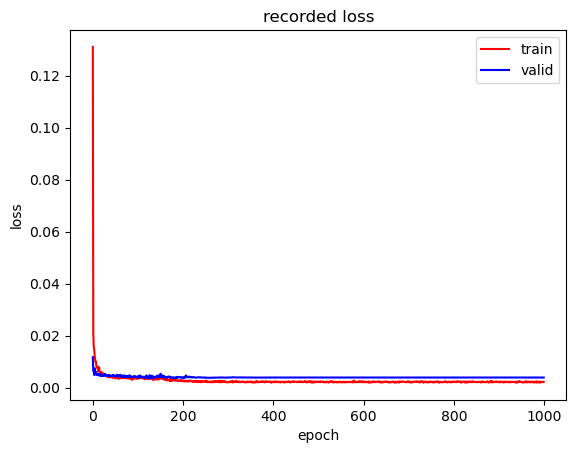

In [4]:
loss_plot(trainloss, testloss)

In [5]:
from Utils import save_with_unique_name 
#### 記得改檔名 ####
filename = 'Models/tainan_features12_model5.pt'
filename = save_with_unique_name(filename)
torch.save(model_trained.state_dict(), filename)

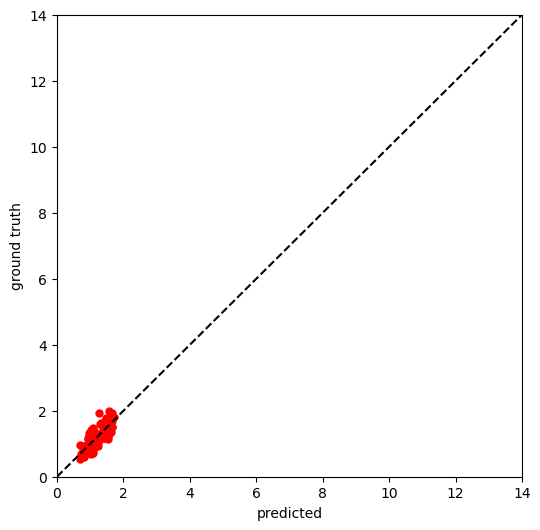

In [6]:
from Utils import true_pred_plot, model_pred

pred_test, true_test = model_pred(model_trained, test_loader, y_scaler_test)
true_pred_plot(pred_test, true_test)

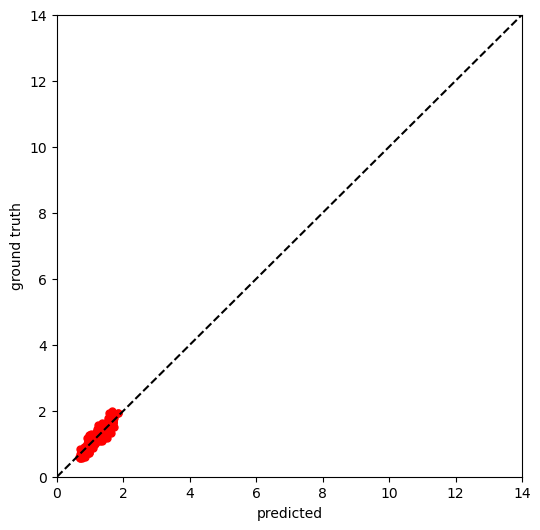

In [7]:
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)
pred_train, true_train = model_pred(model_trained, train_loader, y_scaler_train)
true_pred_plot(pred_train, true_train)